In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
filepath = '/content/gdrive/MyDrive' + '/Colab Notebooks/csv/Titanic/'

df_train = pd.read_csv(filepath + 'train.csv')
df_train.head()

Mounted at /content/gdrive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
x_train = np.zeros([len(df_train), 4])
y_train = df_train["Survived"]

print(x_train.shape, y_train.shape)

(891, 4) (891,)


In [ ]:
x_train[:, 0] = df_train["Sex"].map({"male":0, "female":1}).astype(float)
x_train[:, 1] = df_train["Pclass"].map({3:0, 2:1, 1:3}).astype(float)

# 값의 범위가 너무 광범위하여, 정규화하였음.(값 - 평균) / 표준편차
x_train[:, 2] = (df_train["Fare"] - df_train["Fare"].mean()) / df_train["Fare"].std()

# 데이터 결손 처리, fillna()
x_train[:, 3] = df_train["Embarked"].fillna("S").map({"S":0, "Q":1, "C":2}).astype(float)
# 클래스가 3개 이상일 경우, 숫자를 붙이는 방식에 따라 성능차이가 존재
# 데이터에 순서가 존재하지 않는데, 순서가 존재하게끔 값을 주면 성능에 영향을 줌. → One_Hot 벡터 사용

In [ ]:
w = np.random.rand(4)
b = np.random.rand()

print(w, b)

[0.43951602 0.94754547 0.91907896 0.49223641] 0.6061909175234572


In [ ]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def hypothesis(w, x, b):
    return sigmoid(x.dot(w) + b)

def cost_function(h, y):
    return -np.mean(y * np.log(h + 1e-8) + (1.0 - y) * np.log(1.0 - h + 1e-8))

In [ ]:
epoch = 20000
alpha = 5e-3

total_loss = []
for i in range(epoch):
    h = hypothesis(w, x_train, b)
    loss = cost_function(h, y_train)

    for j in range(4):
        w[j] = w[j] - alpha * np.mean((h - y_train) * x_train[:, j])
    b = b - alpha * np.mean((h - y_train))
    total_loss.append(loss)
total_loss = np.array(total_loss)

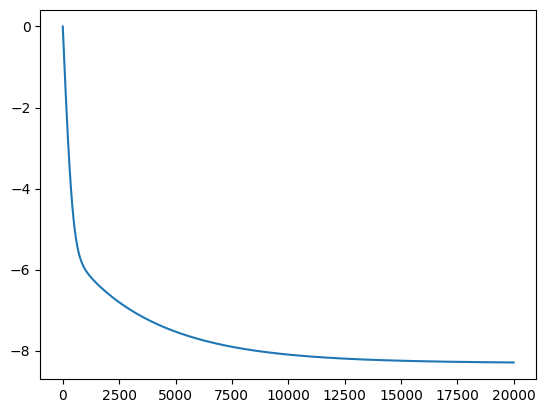

In [ ]:
plt.plot(10.0 * np.log(total_loss / (np.max(total_loss + 1e-5))))
plt.show()

In [ ]:
df_test = pd.read_csv(filepath + 'test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_test.info()
# 객실번호가 NaN이거나 객실 번호가 있거나 이걸로 기준을 정하면 될듯

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
x_test = np.zeros([len(df_test), 4])

print(x_test.shape)

(418, 4)


In [ ]:
x_test[:, 0] = df_test["Sex"].map( {"male":0, "female":1} ).astype(float)
x_test[:, 1] = df_test["Pclass"].map({3:0, 2:1, 1:3}).astype(float)
x_test[:, 2] = (df_test["Fare"].fillna(df_train["Fare"].mean()) - df_train["Fare"].mean()) / df_train["Fare"].std()
# test에 대한 Knowledge가 없기때문에, df_train만 가지고 학습을 하는 것이 당연함.
# 평균, 표준편차, 결손 등의 경우에 training data 사용
x_test[:, 3] = df_test["Embarked"].map({"S":0, "Q":1, "C":2}).astype(float)

In [ ]:
y_pred = hypothesis(w, x_test, b)
y_pred = np.round(y_pred)
# 반올림해서 0.5 보다 크면 생존으로 판단

print(y_pred.shape)

(418,)


In [ ]:
submission = pd.DataFrame({"PassengerId":df_test["PassengerId"].astype(int), 
                           "Survived":y_pred.astype(int)
})

submission.to_csv(filepath + "result.csv", index=False)